# Supported Models for Object Detection

| Algorithm        |        |
|-------------------|-------------------|
| Object Detection  | PP-PicoDet        |
| Faster RCNN       | PP-YOLOv2         |
| FPN               | PP-YOLOE          |
| Cascade-RCNN      | PP-YOLOE+         |
| PSS-Det           | PP-YOLOE-SOD      |
| RetinaNet         | PP-YOLOE-R        |
| YOLOv3            | SSD               |
| YOLOF             | CenterNet         |
| YOLOX             | FCOS              |
| YOLOv5            | a eLOh) 54        |
| YOLOvV6           | a N               |
| YOLOv7            | TOOD              |
| YOLOv8            | Clam              |
| Oe amy BY18       | GFLv2             |
| PP-YOLO           | Deformable DETR   |
| PP-YOLO-Tiny      | Swin Transformer  |
|                   | Sparse RCNN       |


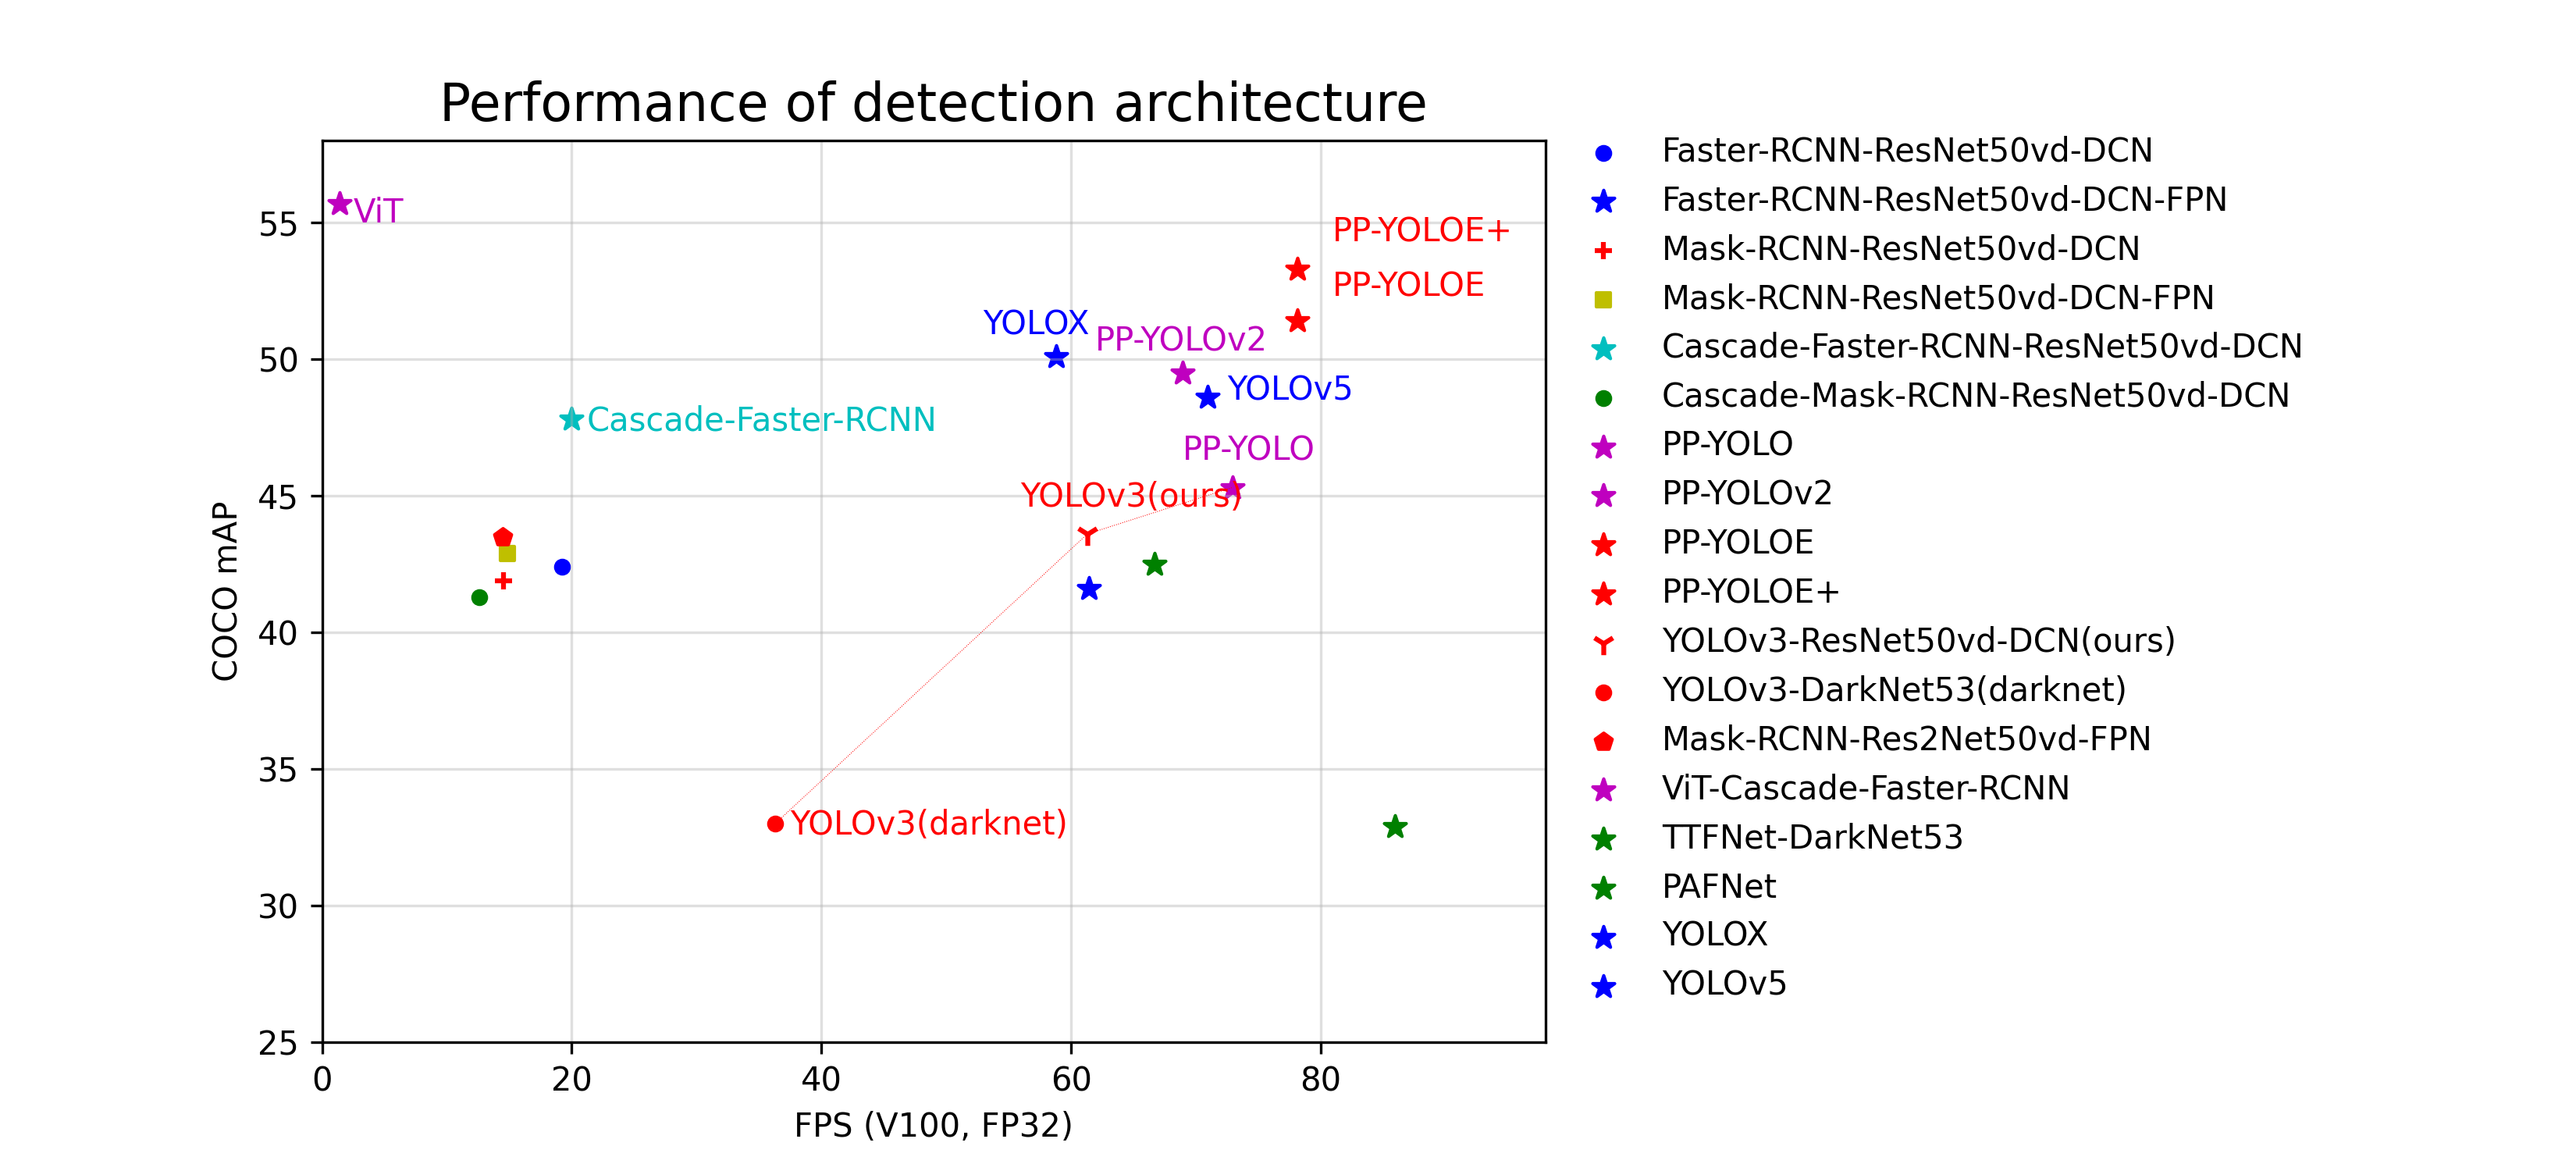

# 1. Setup

## Clone source

In [ ]:
%%shell
git clone https://github.com/PaddlePaddle/PaddleDetection
pip install paddlepaddle-gpu pyclipper attrdict gdown -qqq wandb
cd PaddleDetection
git checkout develop
pip install -q -e .

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 257131, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 257131 (delta 9), reused 1 (delta 1), pack-reused 257112
Receiving objects: 100% (257131/257131), 421.24 MiB | 33.49 MiB/s, done.
Resolving deltas: 100% (209708/209708), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.8/749.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 15.8 MB/s eta 0:00:00
     ━

## Check Paddle

In [ ]:
# Check
import paddle

paddle.utils.run_check()
print(paddle.__version__)

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
2.6.0


In [ ]:
%cd PaddleDetection
!python ppdet/modeling/tests/test_architectures.py

/content/PaddleDetection
/content/PaddleDetection/ppdet/modeling/losses/detr_loss.py:341: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (masks is not None and gt_mask is not None,
/content/PaddleDetection/ppdet/modeling/transformers/matchers.py:136: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (masks is not None and gt_mask is not None,
W0104 06:18:14.548790  3262 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 11.8
W0104 06:18:14.550515  3262 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
.......
----------------------------------------------------------------------
Ran 7 tests in 2.967s

OK


# 2. Create custom data

## Download dataset

In [ ]:
!pip -q install kaggle
!mkdir ~/.kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd /content/
!mkdir my_data
%cd my_data

/content
/content/my_data


In [ ]:
!kaggle datasets download -d aladdinpersson/pascalvoc-yolo

 99% 4.28G/4.31G [00:46<00:00, 140MB/s]
100% 4.31G/4.31G [00:47<00:00, 98.4MB/s]


In [ ]:
!unzip -qq pascalvoc-yolo.zip

## Convert to VOC format

In [ ]:
import os

def delete_unmatched_images(label_file_path, image_dir):
    # Create a set of all label names without the file extension
    label_names = set(label_file.replace('.txt', '') for label_file in os.listdir(label_file_path))

    # Loop through the images and delete those without a corresponding label file
    for image_file in os.listdir(image_dir):
        image_name, extension = os.path.splitext(image_file)
        if image_name not in label_names:
            os.remove(os.path.join(image_dir, image_file))

# Define the label file path and the image directory
label_file_path = '/content/my_data/labels'
image_dir = '/content/my_data/images'

# Run the function to delete unmatched images
delete_unmatched_images(label_file_path, image_dir)

In [ ]:
import xml.etree.ElementTree as ET
from PIL import Image
from tqdm import tqdm

# Dictionary for class ID to name mapping
class_id_to_name = {
    0: 'class0',
    1: 'class1',
    2: 'class2',
    3: 'class3',
    4: 'class4',
    5: 'class5',
    6: 'class6',
    7: 'class7',
    8: 'class8',
    9: 'class9',
    10: 'class10',
    11: 'class11',
    12: 'class12',
    13: 'class13',
    14: 'class14',
    15: 'class15',
    16: 'class16',
    17: 'class17',
    18: 'class18',
    19: 'class19'
    # 20: 'class20' # Uncomment if class 20 exists
}

def rename_and_convert_files(label_file_path, output_dir, image_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Sorted list of files ensures the naming starts from the smallest number
    sorted_label_files = sorted(os.listdir(label_file_path))

    for index, label_file in enumerate(tqdm(sorted_label_files), start=1):
        # Generate new file name based on index
        new_file_base = f"{index:06d}"
        new_label_filename = new_file_base + ".txt"
        new_image_filename = new_file_base + ".jpg"

        # Rename label file
        old_label_path = os.path.join(label_file_path, label_file)
        new_label_path = os.path.join(label_file_path, new_label_filename)
        os.rename(old_label_path, new_label_path)

        # Rename corresponding image file
        old_image_filename = label_file.replace('.txt', '.jpg')
        old_image_path = os.path.join(image_dir, old_image_filename)
        new_image_path = os.path.join(image_dir, new_image_filename)
        os.rename(old_image_path, new_image_path)

    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Process each file in the label directory
    for label_file in tqdm(os.listdir(label_file_path)):
        # Corresponding image file path
        image_file_name = label_file.replace('.txt', '.jpg')
        image_file_path = os.path.join(image_dir, image_file_name)

        # Open the image to get its dimensions
        with Image.open(image_file_path) as img:
            image_width, image_height = img.size
            image_depth = len(img.getbands())

        # Create the file structure
        annotation = ET.Element('annotation')
        ET.SubElement(annotation, 'folder').text = 'images'
        ET.SubElement(annotation, 'filename').text = image_file_name
        size = ET.SubElement(annotation, 'size')
        ET.SubElement(size, 'width').text = str(image_width)
        ET.SubElement(size, 'height').text = str(image_height)
        ET.SubElement(size, 'depth').text = str(image_depth)
        ET.SubElement(annotation, 'segmented').text = '0'

        # Process the label file
        with open(os.path.join(label_file_path, label_file), 'r') as file:
            for line in file:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center_rel = float(parts[1])
                y_center_rel = float(parts[2])
                width_rel = float(parts[3])
                height_rel = float(parts[4])

                # Calculate absolute coordinates
                x_center_abs = x_center_rel * image_width
                y_center_abs = y_center_rel * image_height
                box_width_abs = width_rel * image_width
                box_height_abs = height_rel * image_height
                xmin = int(x_center_abs - (box_width_abs / 2))
                ymin = int(y_center_abs - (box_height_abs / 2))
                xmax = int(x_center_abs + (box_width_abs / 2))
                ymax = int(y_center_abs + (box_height_abs / 2))

                # Add object element
                object = ET.SubElement(annotation, 'object')
                ET.SubElement(object, 'name').text = class_id_to_name.get(class_id, 'unknown')
                ET.SubElement(object, 'pose').text = 'Unspecified'
                ET.SubElement(object, 'truncated').text = '0'
                ET.SubElement(object, 'occluded').text = '0'
                ET.SubElement(object, 'difficult').text = '0'
                bndbox = ET.SubElement(object, 'bndbox')
                ET.SubElement(bndbox, 'xmin').text = str(xmin)
                ET.SubElement(bndbox, 'ymin').text = str(ymin)
                ET.SubElement(bndbox, 'xmax').text = str(xmax)
                ET.SubElement(bndbox, 'ymax').text = str(ymax)

        # Create a new XML file in the output directory
        tree = ET.ElementTree(annotation)
        tree.write(os.path.join(output_dir, label_file.replace('.txt', '.xml')))

# Define the label file path, the output directory, and the image directory
label_file_path = '/content/my_data/labels'
output_dir = '/content/my_data/annotations'
image_dir = '/content/my_data/images'

# Run the renaming and conversion function
rename_and_convert_files(label_file_path, output_dir, image_dir)

100%|██████████| 21503/21503 [00:08<00:00, 2395.82it/s]


## Create config file for dataset

In [ ]:
# Generating label_list.txt
!echo -e "class0\nclass1\nclass2\nclass3\nclass4\nclass5\nclass6\nclass7\nclass8\nclass9\nclass10\nclass11\nclass12\nclass13\nclass14\nclass15\nclass16\nclass17\nclass18\nclass19" > label_list.txt

In [ ]:
# Generating train.txt, valid.txt and test.txt
!ls images/*.jpg | shuf > all_image_list.txt
!awk -F"/" '{print $2}' all_image_list.txt | awk -F".jpg" '{print $1}'  | awk -F"\t" '{print "images/"$1".jpg annotations/"$1".xml"}' > all_list.txt

In [ ]:
# The proportion of training set, verification set and test set is about 70%, 20% and 10% respectively.
%%bash
# Calculate the total number of lines
total_lines=$(wc -l < all_list.txt)

# Calculate the line numbers for 70%, 20%, and 10% (using bash arithmetic)
train_lines=$((total_lines * 70 / 100))
valid_lines=$((total_lines * 20 / 100))
test_lines=$((total_lines - train_lines - valid_lines))

# Split the file based on calculated line numbers
head -n $train_lines all_list.txt > train.txt
head -n $(($train_lines + $valid_lines)) all_list.txt | tail -n $valid_lines > valid.txt
tail -n $test_lines all_list.txt > test.txt


In [ ]:
%%shell
echo 'metric: VOC
map_type: integral
num_classes: 20

TrainDataset:
  name: VOCDataSet
  dataset_dir: /content/my_data
  anno_path: train.txt
  label_list: label_list.txt
  data_fields: ['image', 'gt_bbox', 'gt_class', 'difficult']

EvalDataset:
  name: VOCDataSet
  dataset_dir: /content/my_data
  anno_path: valid.txt
  label_list: label_list.txt
  data_fields: ['image', 'gt_bbox', 'gt_class', 'difficult']

TestDataset:
  name: ImageFolder
  anno_path: /content/my_data/label_list.txt' > /content/PaddleDetection/configs/datasets/my_data.yml


# Create config file for model

In [ ]:
%%shell
echo '_BASE_: [
  '../../datasets/my_data.yml',
  '../../runtime.yml',
  '../_base_/optimizer_80e.yml',
  '../_base_/ppyoloe_plus_crn.yml',
  '../_base_/ppyoloe_plus_reader.yml',
]

log_iter: 100
snapshot_epoch: 1
weights: /content/PaddleDetection/output/best_model/model.pdparams

pretrain_weights: https://bj.bcebos.com/v1/paddledet/models/ppyoloe_plus_crn_l_80e_coco.pdparams
depth_mult: 1.0
width_mult: 1.0


TrainReader:
  batch_size: 12

EvalReader:
  batch_size: 12


epoch: 3
LearningRate:
  base_lr: 0.001
  schedulers:
    - !CosineDecay
      max_epochs: 36
    - !LinearWarmup
      start_factor: 0.
      epochs: 1


PPYOLOEHead:
  static_assigner_epoch: -1
  nms:
    name: MultiClassNMS
    nms_top_k: 1000
    keep_top_k: 300
    score_threshold: 0.01
    nms_threshold: 0.7' > /content/PaddleDetection/configs/ppyoloe/voc/my_model.yml


# Training

In [ ]:
%cd /content/PaddleDetection
!python -u tools/train.py -c /content/PaddleDetection/configs/ppyoloe/voc/my_model.yml --eval --amp --use_wandb=True

/content/PaddleDetection
W0104 08:10:56.718048 31529 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 11.8
W0104 08:10:56.720160 31529 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
wandb: Currently logged in as: bmd1905. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /content/PaddleDetection/wandb/run-20240104_081102-heqv1p3i
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run cerulean-terrain-3
wandb: ⭐️ View project at https://wandb.ai/bmd1905/PaddleDetection-tools
wandb: 🚀 View run at https://wandb.ai/bmd1905/PaddleDetection-tools/runs/heqv1p3i
[01/04 08:11:06] ppdet.utils.checkpoint INFO: The shape [80] in pretrained weight yolo_head.pred_cls.0.bias is unmatched with the shape [20] in model yolo_head.pred_cls.0.bias. And the weight yolo_head.pred_cls.0.bias will not be loaded
[01/04 08:11:06] ppdet.utils.check

# Evaluation

In [ ]:
!python tools/eval.py -c /content/PaddleDetection/configs/ppyoloe/voc/my_model.yml -o use_gpu=true --amp

W0104 09:35:18.969096 52446 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 11.8
W0104 09:35:18.970566 52446 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[01/04 09:35:23] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/PaddleDetection/output/best_model/model.pdparams
[01/04 09:35:25] ppdet.engine INFO: Eval iter: 0
[01/04 09:36:31] ppdet.engine INFO: Eval iter: 100
[01/04 09:37:35] ppdet.engine INFO: Eval iter: 200
[01/04 09:38:41] ppdet.engine INFO: Eval iter: 300
[01/04 09:39:15] ppdet.metrics.metrics INFO: Accumulating evaluatation results...
[01/04 09:39:22] ppdet.metrics.metrics INFO: mAP(0.50, integral) = 80.43%
[01/04 09:39:22] ppdet.engine INFO: Total sample number: 4300, average FPS: 18.50452443059799
